In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install geopandas matplotlib mapclassify contextily

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import contextily as ctx
import os

# Configure plot styles for better aesthetics
plt.style.use('seaborn-v0_8-whitegrid')

In [6]:
file_path = "/content/drive/MyDrive/open rivers/oprvrs_gb.gpkg"

In [7]:
layer_name = "watercourse_link"

In [8]:
print(f"Loading data from {file_path}...")
gdf = gpd.read_file(file_path, layer=layer_name)

# 1. Basic Inspection
print(f"Total rows: {len(gdf)}")
print(f"CRS (Coordinate System): {gdf.crs}")
print("\n--- Column Info ---")
gdf.info()

# 2. Preview Data
print("\n--- First 5 Rows ---")
display(gdf.head())

Loading data from /content/drive/MyDrive/open rivers/oprvrs_gb.gpkg...
Total rows: 192738
CRS (Coordinate System): EPSG:27700

--- Column Info ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 192738 entries, 0 to 192737
Data columns (total 10 columns):
 #   Column                        Non-Null Count   Dtype   
---  ------                        --------------   -----   
 0   id                            192738 non-null  object  
 1   flow_direction                192707 non-null  object  
 2   length                        192738 non-null  float64 
 3   fictitious                    192738 non-null  object  
 4   form                          192738 non-null  object  
 5   watercourse_name              105407 non-null  object  
 6   watercourse_name_alternative  5176 non-null    object  
 7   start_node                    192738 non-null  object  
 8   end_node                      192738 non-null  object  
 9   geometry                      192738 non-null  geometry
dt

,id,flow_direction,length,fictitious,form,watercourse_name,watercourse_name_alternative,start_node,end_node,geometry
0,73E1A217-C5BF-41E3-AA17-F969F5181E04,in direction,18.0,0,tidalRiver,None,None,6B77D6D2-B9B2-4FBE-AEA3-8A801079B231,35806C2B-E01E-4CB8-9767-3D6F86302713,"LINESTRING (463513.13 1211952.73, 463524.68 12..."
1,A44E2603-3307-4555-9604-3DAB8AA308C6,in direction,1009.0,0,inlandRiver,None,None,8FA84F8B-71CE-4626-8CEC-5964B94D34CC,D2571525-C2FD-4A2A-8236-7E938081B3E7,"LINESTRING (463559.61 1212995.55, 463604.12 12..."
2,83332CB1-EC9C-486C-AC88-0BE480176548,in direction,1352.0,0,inlandRiver,Burn of Norwick,None,5EEC6ADE-DF7B-4B72-BE47-C78F810C39BF,C3EE6BFE-7B45-4251-951D-4F2A3BB4BBC3,"LINESTRING (463963.5 1214106.5, 463952.5 12140..."
3,83C8021E-C7EF-4C2B-955A-3365D9DDF079,in direction,165.0,0,inlandRiver,None,None,5CF9C9E6-F0D3-4421-81AD-989455DD490C,5EEC6ADE-DF7B-4B72-BE47-C78F810C39BF,"LINESTRING (463993.19 1214238.57, 464010.7 121..."
4,58F9A511-A4BD-47F4-95C1-FE396F677E1B,in direction,27.0,0,inlandRiver,None,None,D2571525-C2FD-4A2A-8236-7E938081B3E7,1740F423-BAF7-4B61-AE72-743CC7BE3D60,"LINESTRING (464188.6 1212433.5, 464188.38 1212..."


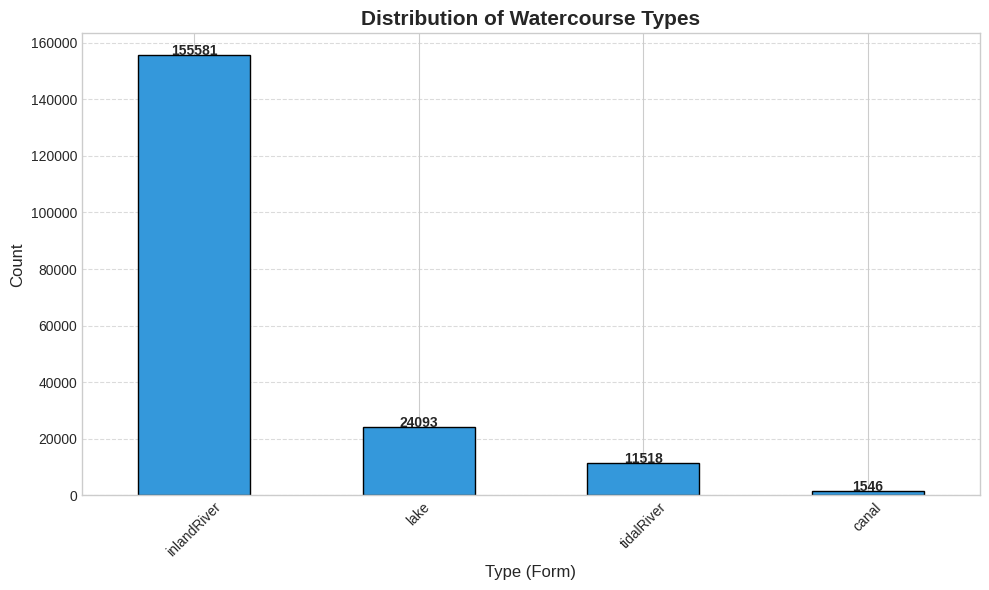

In [9]:
# Analyze the 'form' column (River Type)
form_counts = gdf['form'].value_counts()

# Visualization: Bar Chart
plt.figure(figsize=(10, 6))
bars = form_counts.plot(kind='bar', color='#3498db', edgecolor='black')

plt.title('Distribution of Watercourse Types', fontsize=15, fontweight='bold')
plt.xlabel('Type (Form)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of bars
for i, v in enumerate(form_counts):
    plt.text(i, v + 50, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


--- Length Statistics (meters) ---
count    192738.000000
mean        791.135054
std        1059.760442
min           1.000000
25%         136.000000
50%         440.000000
75%        1050.750000
max       41462.000000
Name: length, dtype: float64


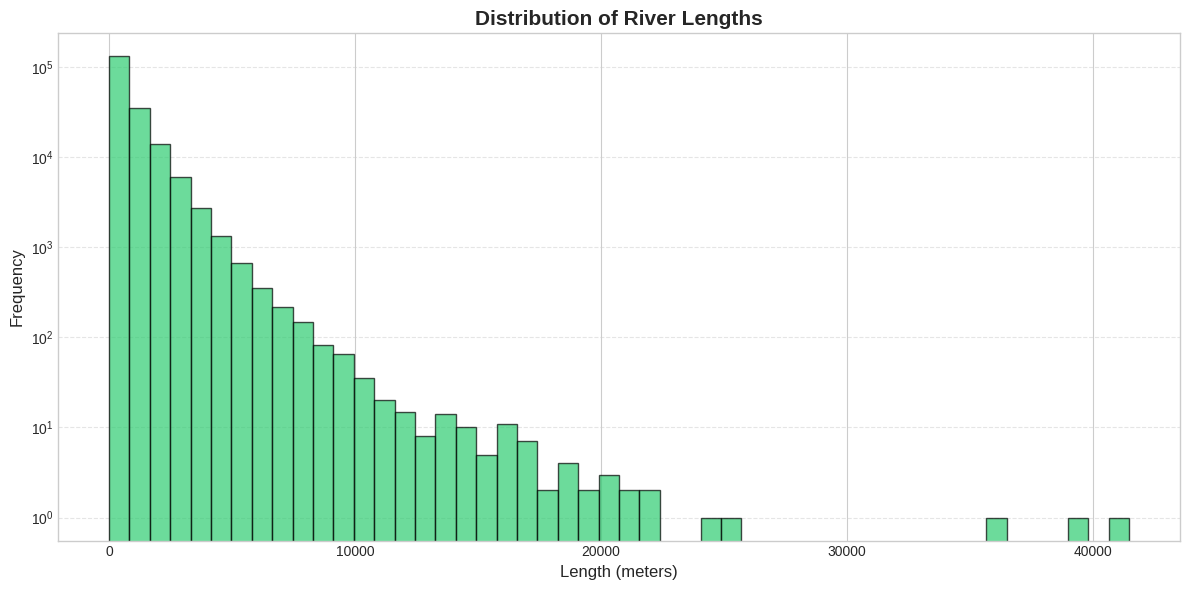

In [10]:
# Analyze the 'length' column
# Descriptive Statistics
print("\n--- Length Statistics (meters) ---")
print(gdf['length'].describe())

# Visualization: Histogram
plt.figure(figsize=(12, 6))
plt.hist(gdf['length'], bins=50, color='#2ecc71', edgecolor='black', alpha=0.7)

plt.title('Distribution of River Lengths', fontsize=15, fontweight='bold')
plt.xlabel('Length (meters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log') # Log scale helps to see the distribution better if there are many small rivers
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

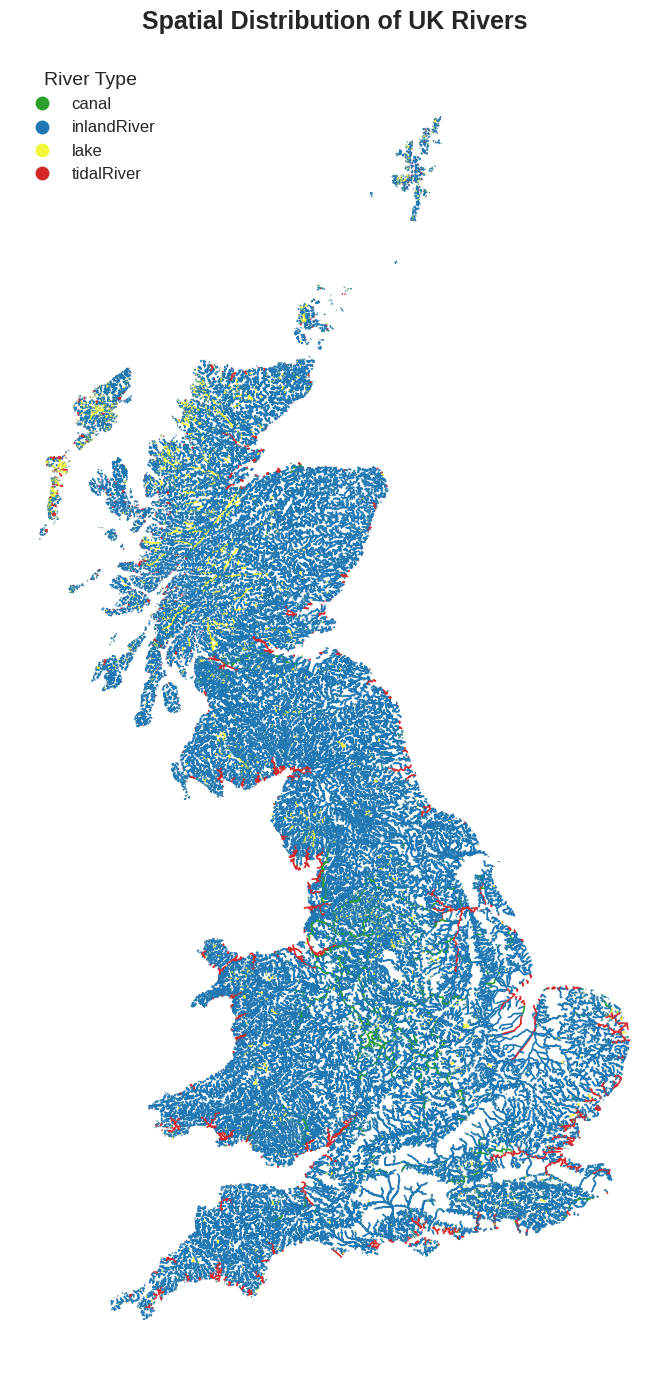

In [30]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# 1. Define your manual color map
color_map = {
    'inlandRiver': '#1f77b4',  # Blue
    'tidalRiver': '#d62728',   # Red
    'canal': '#2ca02c',        # Green
    'lake': '#f4f739',         # Yellow
    'manMade': '#8c564b',      # Brown
}

# 2. Create a custom colormap that matches the data's category order
# Geopandas plots categories in sorted order, so we align our colors to that.
unique_forms = sorted(gdf['form'].unique())
# Use .get() to return gray ('#999999') for any form not in your dictionary
colors = [color_map.get(form, '#999999') for form in unique_forms]
custom_cmap = ListedColormap(colors)

# 3. Visualization
fig, ax = plt.subplots(figsize=(14, 14))

gdf.plot(column='form',
         ax=ax,
         legend=True,
         cmap=custom_cmap, # Use the custom object, not the dict
         linewidth=1.2,
         legend_kwds={'loc': 'upper left', 'title': 'River Type', 'fontsize': 12, 'title_fontsize': 14})

ax.set_axis_off()
plt.title('Spatial Distribution of UK Rivers', fontsize=18, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

Hydro Nodes loaded successfully.


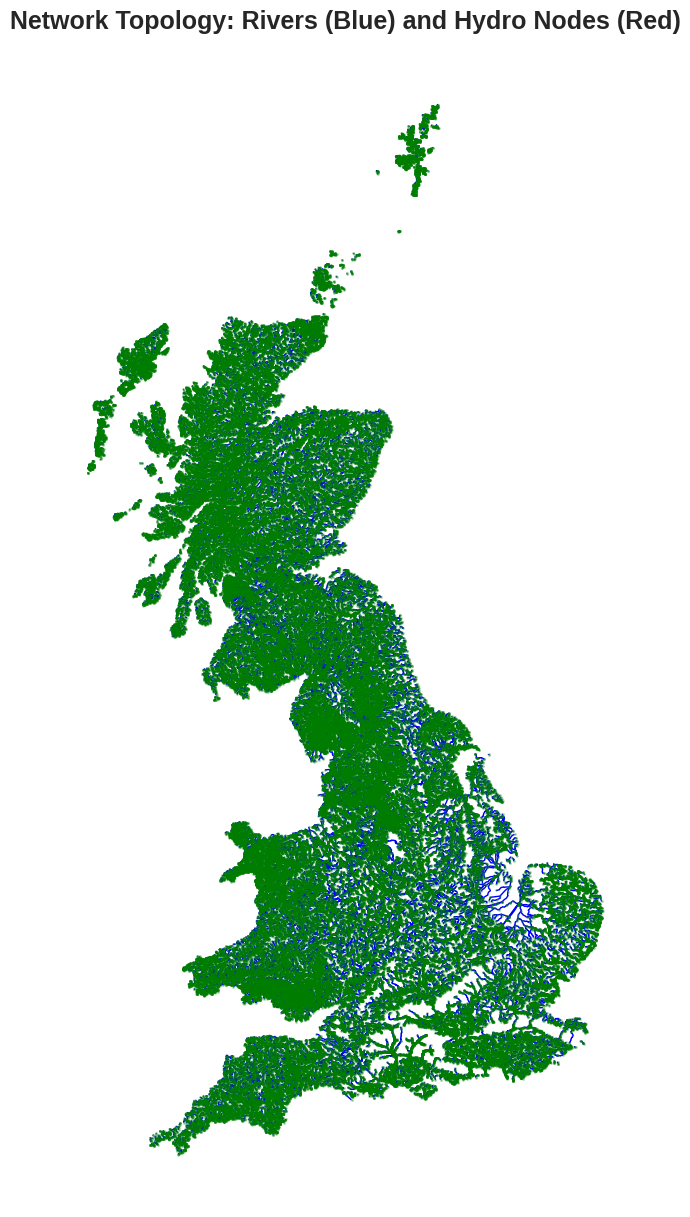


--- Node Data Structure ---
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 197425 entries, 0 to 197424
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   id                   197425 non-null  object  
 1   hydro_node_category  143190 non-null  object  
 2   geometry             197425 non-null  geometry
dtypes: geometry(1), object(2)
memory usage: 4.5+ MB


In [33]:
import matplotlib.pyplot as plt

# 1. Load both layers
# We already have 'watercourse_link' in 'gdf', let's load 'hydro_node'
try:
    node_gdf = gpd.read_file(file_path, layer='hydro_node')
    print("Hydro Nodes loaded successfully.")

    # 2. Visualize: Rivers + Nodes
    fig, ax = plt.subplots(figsize=(15, 15))

    # Plot Rivers (Background, thin and grey)
    gdf.plot(ax=ax, color='blue', linewidth=1, zorder=1)

    # Plot Nodes (Foreground, colored by 'form' or just specific type)
    # Usually nodes have categories like 'source', 'junction', 'outlet'
    # Let's verify columns first, but for now plot all as red dots
    node_gdf.plot(ax=ax, color='green', markersize=1, zorder=2, alpha=0.3)

    ax.set_axis_off()
    plt.title('Network Topology: Rivers (Blue) and Hydro Nodes (Red)', fontsize=18, fontweight='bold')
    plt.show()

    # 3. Analyze Node Types (If 'form' or 'type' column exists)
    print("\n--- Node Data Structure ---")
    node_gdf.info()

    # Check if there is a categorical column to analyze (often 'form' or 'function')
    if 'form' in node_gdf.columns:
        print("\n--- Node Types Distribution ---")
        print(node_gdf['form'].value_counts())

except Exception as e:
    print(f"Could not load or visualize hydro_node: {e}")